# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [1]:
import numpy as np
import pandas as pd
from math import pi, sin, cos
import matplotlib.pyplot as plt

Text(0.5, 0.98, 'Fails verticle line test')

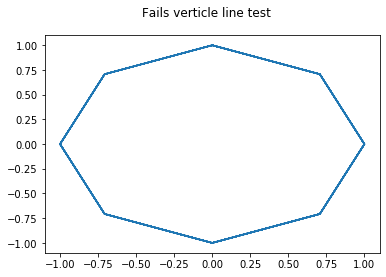

In [2]:
t = np.arange(0,12*pi, pi/4)
m = [sin(x) for x in t]
n = [cos(x) for x in t]

plt.plot(m, n)
plt.suptitle("Fails verticle line test")

Text(0.5, 0.98, 'Passes verticle line test')

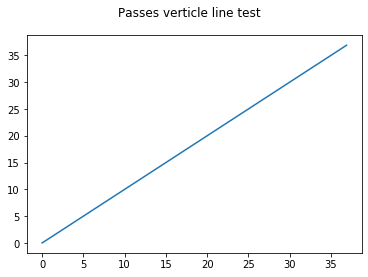

In [3]:
y = t
plt.plot(t,y)
plt.suptitle("Passes verticle line test")

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

**A function should have unique output for any unique set of inputs in general.  A function represents a mapping of inputs to outputs where any input is mapped to a single output.**

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

**We are looking for unique output ([i][1]) for set of ([i][0])**

**Relations 1 and 2 are functions.  3, 4, and 5 are not.**

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

domain(m).dim = 3; domain(m).codom = 3

domain(n).dim = 4; domain(n).codom = 2

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

[1,2,3] -> [1,2,3,0] contains the same amount of information + relation to 4d space.  

You can probably place information in context of higher dimensional space, but you're just adding null vectors.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

p = f(x1*[1,0]) + f(x2*[[0,1]) = Tp = [[1,3],[2,-1].  likequite Tq = [[4,1,2],[1,-1,-2],[5,-2,1]]

In [4]:
Tp = np.array([
    [1,3],
    [2,-1]
])
Tq = np.array([
    [4,1,2],
    [2,-1,3],
    [5,-2,1]
])

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [5]:
input_v1 = np.array([1,1])
input_v2 = np.array([1,1,1])

print(np.matmul(Tp, input_v1))
print(np.matmul(Tq, input_v2))

[4 1]
[7 4 4]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvalues and eigenvectors (eigenpairs) describe the spread of data independent of valid linear transformation.  One can look at an eigenvalue/eigenvector pair against the sum of the set of eigenpairs that describes the data and figure out which 'directions' might be more responsible for the spread of data.  By choosing to eliminate or reduce an eigenpair, you can see a shadow of the data.  By eliminating eigenpairs of small relative magnitude compared to sum of the set of eigenpairs, you can reduce the total dimensionality of data, compressing it, simplifying it, in a way that is describable and somewhat recoverable. 

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

The curse of dimensionality: as datapoints grow in dimension, their clustering becomes more sparse.  Getting useful information fromt the data becomes more difficult statistically and computationally. 

Representing data in high dimensions may also be difficult as current visualizations are only good for maybe 4 or 5 dimensions using a 3D plot, shape, color, size.  Interpretation becomes ever more difficult.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

The number of observations, N, (rows) must exceed the number of dimensions, D, (columns, not-tidy) signficantly.  Either try to ascribe by N > 2^D or N > 5*(D+2) whichever is greater

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [6]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import wget
from snippets import files

link = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv"
files.DownloadFile(link, 'iris')
#alternative df = pd.read_csv(link)

File already exists


'iris.csv'

In [15]:
# Load data
data = pd.read_csv('iris.csv')
data.sample(15)

sepal_length  sepal_width  petal_length  petal_width     species
98            5.1          2.5           3.0          1.1  versicolor
89            5.5          2.5           4.0          1.3  versicolor
129           7.2          3.0           5.8          1.6   virginica
147           6.5          3.0           5.2          2.0   virginica
68            6.2          2.2           4.5          1.5  versicolor
46            5.1          3.8           1.6          0.2      setosa
132           6.4          2.8           5.6          2.2   virginica
145           6.7          3.0           5.2          2.3   virginica
106           4.9          2.5           4.5          1.7   virginica
120           6.9          3.2           5.7          2.3   virginica
35            5.0          3.2           1.2          0.2      setosa
22            4.6          3.6           1.0          0.2      setosa
12            4.8          3.0           1.4          0.1      setosa
146           6.3          2.5           5.0          1.9   virginica
17            5.1          3.5           1.4          0.3      setosa

In [17]:
# Encode categorical
x = data.copy()
species = {
    'species': {'setosa':0, 'versicolor':1, 'virginica':2}
}
x.replace(species, inplace=True)
# Create PCA model
pca = PCA(3)
# Fit model to data
pca.fit(x)
# Check found attributes prior to transformation
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)
# Transorm data and assign to new matrices
data_t = pca.transform(x)



 Eigenvectors: 
 [[ 0.33418606 -0.07826103  0.80046289  0.33708273  0.35753221]
 [ 0.68858026  0.68410307 -0.09876295 -0.06819839 -0.2084588 ]
 [-0.44123572  0.61107009 -0.14879435  0.4238525   0.47970166]]

 Eigenvalues: 
 [4.83503474 0.25208634 0.09589794]


In [18]:
data_t[0:10]

array([[-2.86550669,  0.30278044,  0.04848972],
       [-2.89321339, -0.17698715, -0.16879818],
       [-3.0557491 , -0.16800629,  0.05654241],
       [-2.92124902, -0.32502721,  0.00980011],
       [-2.9067514 ,  0.30233272,  0.1537203 ],
       [-2.48899988,  0.73972719,  0.20067924],
       [-2.99106535, -0.11673983,  0.25038582],
       [-2.81105291,  0.15563581,  0.01662685],
       [-3.05248032, -0.58968758, -0.00928733],
       [-2.85470148, -0.11163329, -0.16495586]])

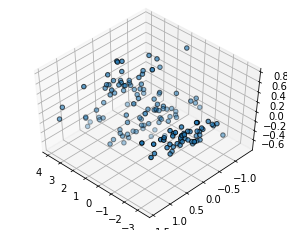

In [19]:
# Plot data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax.scatter(data_t[:, 0], data_t[:, 1], data_t[:, 2], cmap=plt.cm.nipy_spectral,
           edgecolor='k')

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)